In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.rename(columns = {'median_house_value':'price','median_income':'income'}, inplace = True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,income,price,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.drop('ocean_proximity',axis=1,inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,income,price
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,income,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
income                  0
price                   0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
income                0
price                 0
dtype: int64

#EDA

In [9]:
#correlation
corr_matrix=df.corr()

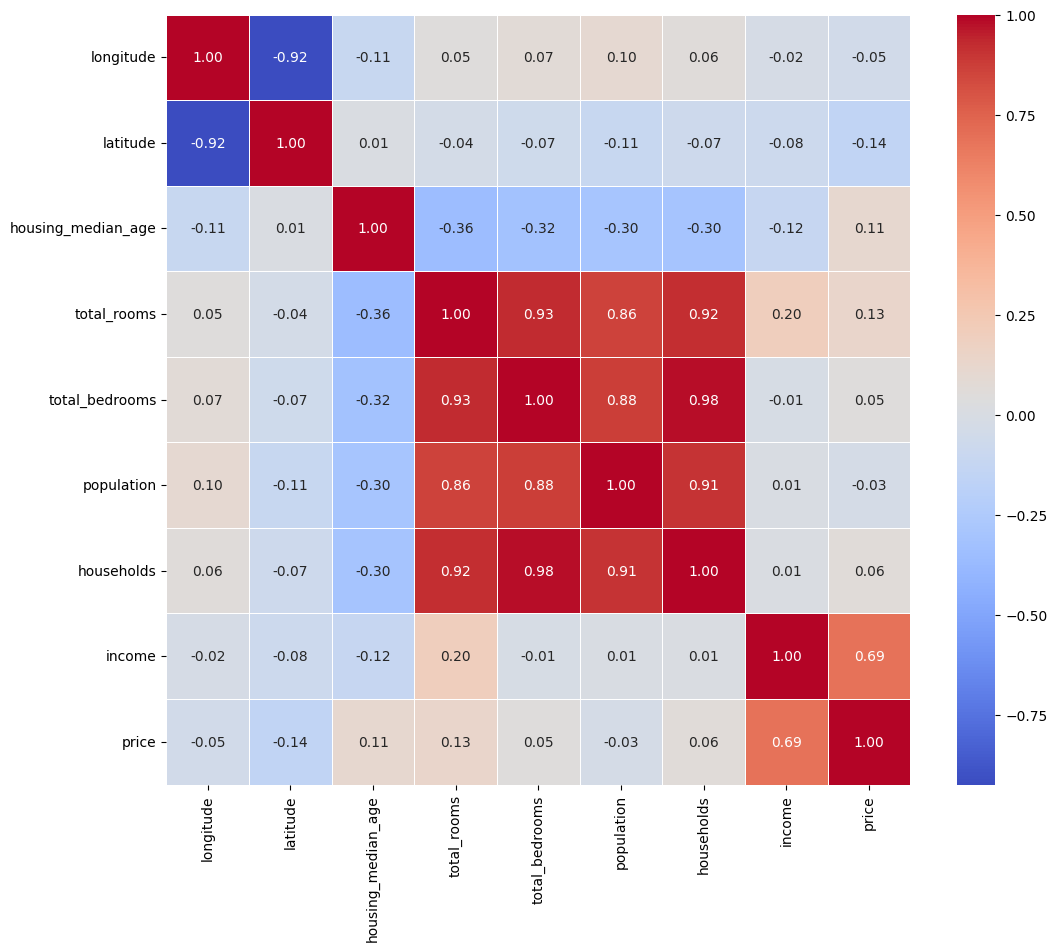

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.show()

# to to check multicollinearity

In [11]:
X = df.iloc[:,:-1]
y = df['price']

In [12]:
# from numpy.linalg import cond

# # Calculate the condition number
# condition_number = cond(X)

# # Display the condition number
# print('Condition Number:', condition_number)

# Analyze the correlated data

# to see individual relationship of independent features with dependent features with the help of pairplot

In [13]:
# sns.pairplot(df, x_vars=X, y_vars=y, kind='scatter', height=4)
# plt.show()

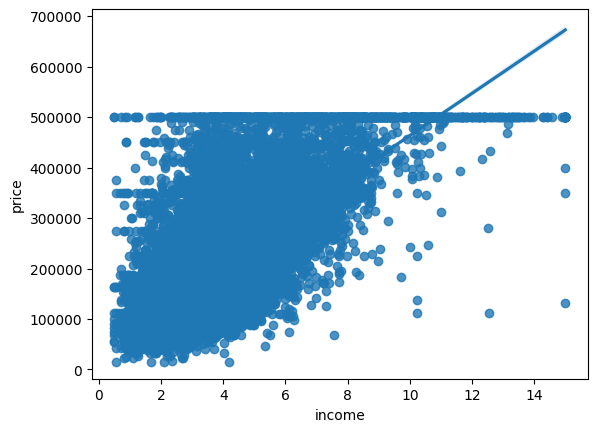

In [14]:
sns.regplot(x=df['income'],y=df['price'])
plt.show()

#create the model


In [15]:
# Independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [16]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [17]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,income
19566,-120.96,37.61,23.0,3497.0,887.0,2467.0,816.0,1.9444
7292,-118.22,33.98,34.0,2225.0,753.0,2980.0,736.0,1.6685
17618,-121.94,37.28,27.0,2859.0,464.0,1144.0,430.0,5.0822
17518,-121.91,37.34,35.0,2189.0,607.0,1193.0,562.0,2.8042
5172,-118.28,33.95,41.0,835.0,208.0,707.0,192.0,1.4103
...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879


# normalizing or standardrizing the data by using standardscale before model training

In [18]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#The primary reason we don't apply fit_transform to our test data is to avoid data leakage and to ensure that our model's evaluation is fair and unbiased.
X_test = scaler.transform(X_test)

In [19]:
X_train
# X_test

array([[-0.68684567,  0.92079826, -0.44520313, ...,  0.91053523,
         0.83541917, -1.0159178 ],
       [ 0.68114892, -0.77889909,  0.42830842, ...,  1.35816955,
         0.6252194 , -1.16085401],
       [-1.1761284 ,  0.76628032, -0.12756257, ..., -0.2438901 ,
        -0.17879472,  0.63243606],
       ...,
       [ 0.5812953 , -0.76485201,  1.06358955, ..., -0.41142575,
        -0.35746453, -0.40938158],
       [-1.22605521,  0.90206881, -1.31871469, ...,  1.75606672,
         1.46864598,  0.7404947 ],
       [-1.42076977,  0.9769866 ,  1.85769097, ...,  0.73863668,
         0.39137215,  0.00793384]])

#model training

In [20]:
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

In [21]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [22]:
LR.coef_

array([-84375.97162725, -89831.53727522,  14958.41670461, -18626.46943218,
        49648.87984197, -40770.03141072,  14221.77563676,  76771.50828879])

In [23]:
LR.intercept_

207283.98035377174

In [24]:
y_pred=LR.predict(X_test)
y_pred

array([196980.02029312, 158095.83507498, 203028.20805884, ...,
       146710.62625887,  13392.0574117 ,  95881.80878573])

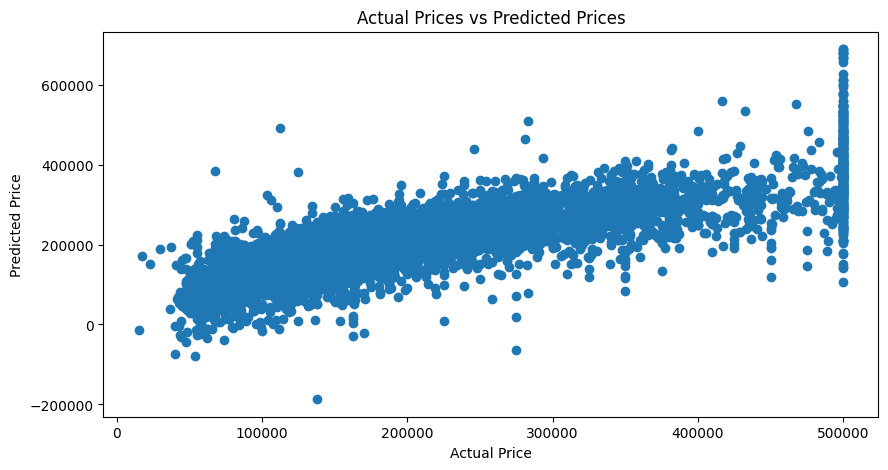

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
rmse

4738972791.400469


68840.19749681481

In [27]:
r2 = r2_score(y_test, y_pred)
r2

0.6445130291082353

#adjusted r2 score
adjur2 = 1 -[(1 - r2_score)*(n-1)/(n-k-1)]

In [30]:
adj_r2_score = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
adj_r2_score

0.6440484161745423

In [31]:
len(y_test)

6130

In [55]:
X_test.shape[1] #no of coloumns

8

# New data prediction

In [51]:
X.iloc[0].values.reshape(1,-1).shape

(1, 8)

In [52]:
LR.predict(X.iloc[0].values.reshape(1,-1))

array([-12952420.37866127])

# you are getting negative value because you did not do standardize of new data


# always remember to standardrize the new data

In [56]:
# transform the data
new_data = scaler.transform(X.iloc[0].values.reshape(1,-1))

In [57]:
LR.predict(new_data)

array([207283.98035377])

# Pickling the model file for deployment

In [58]:
import pickle

In [59]:
pickle.dump(LR,open('LR.pkl','wb'))
# wb is used for writing the file in binary mode

In [60]:
pickle_model=pickle.load(open('LR.pkl','rb'))

In [61]:
pickle_model.predict(new_data)

array([207283.98035377])